### 이미지 데이터 읽기(PIL, Tensorflow, CV2)

In [5]:
# PIL
# From PIL import Image
# image = Image.open('dog.jpg')
# plt.imshow(image)

# Tensorflow
# import tensorflow as tf
# image = tf.io.read_file('dog.jpg')
# image = tf.image.decode_image(image)
# plt.imshow(image)

# CV2
# import cv2
# image = cv2.imread('dog.jpg')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(image)

### Dataset from_tensor_slices 이용하여 입력 파이프라인 구축

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
print("The shape of train dataset : ", x_train.shape)
print("The shape of test dataset: ", x_test.shape)

The shape of train dataset :  (60000, 28, 28)
The shape of test dataset:  (10000, 28, 28)


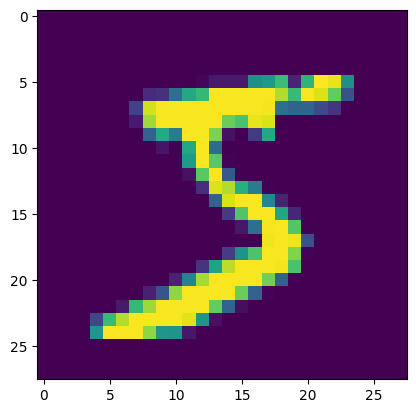

In [18]:
plt.imshow(x_train[0])

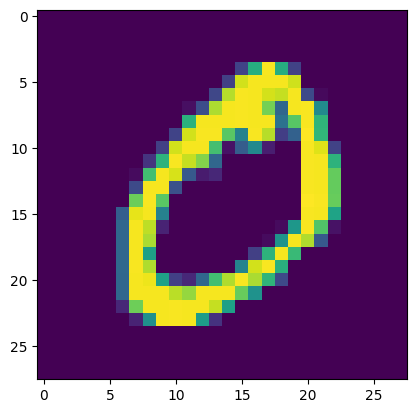

In [20]:
plt.imshow(x_train[1])

In [22]:
# Add a channels dimension. 이미지 사이즈로 만들어 줌. 원래 이미지는 Heght x Width x Channel 3차원으로 구성
# x_train.reshape(-1, 28, 28, 1) 사용해도 됨

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [24]:
print("The shape of train dataset: ", x_train.shape)
print("The shape of test dataset: ", x_test.shape)

The shape of train dataset:  (60000, 28, 28, 1)
The shape of test dataset:  (10000, 28, 28, 1)


In [26]:
# 파이프라인
# from_tensor_slices : 입력 받기
# shuffle
# batch
# cache(데이터 일부를 캐시 메모리에 저장할 수 있도록 함)
# prefetch(모델이 s번째 데이터를 읽는 동안, s+1번째 데이터를 준비)

AUTOTUNE = tf.data.experimental.AUTOTUNE # 병렬 처리

# train dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(10000)
train_ds = train_ds.batch(32)
train_ds = train_ds.prefetch(AUTOTUNE)

# test dataset
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)
test_ds = test_ds.prefetch(AUTOTUNE)

In [28]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

In [30]:
x_train_sample, y_train_sample = next(iter(train_ds))

In [32]:
# 첫번째 샘플은 1개의 batch로 32개 이미지 구성
# 두번째 샘플은 32개의 label로 구성

print(x_train_sample.shape, y_train_sample.shape)

(32, 28, 28, 1) (32,)


In [34]:
print(type(x_train_sample), type(y_train_sample))

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


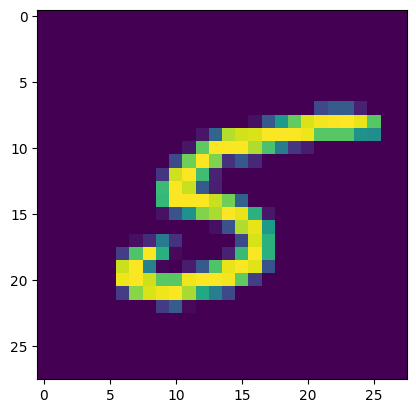

In [36]:
plt.imshow(x_train_sample[0])

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [46]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
             loss = tf.keras.losses.sparse_categorical_crossentropy,
             metrics = [tf.keras.metrics.sparse_categorical_accuracy])

history = model.fit(train_ds, epochs = 5, batch_size = 32, validation_data=(test_ds))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - loss: 0.4780 - sparse_categorical_accuracy: 0.8633 - val_loss: 0.1419 - val_sparse_categorical_accuracy: 0.9564
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - loss: 0.1314 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.1024 - val_sparse_categorical_accuracy: 0.9685
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - loss: 0.0886 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.1041 - val_sparse_categorical_accuracy: 0.9685
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - loss: 0.0677 - sparse_categorical_accuracy: 0.9796 - val_loss: 0.0840 - val_sparse_categorical_accuracy: 0.9745
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - loss: 0.0564 - sparse_categorical_accuracy: 0.9824 - val_loss: 0.0946 - val_sparse_categorical_accuracy: 0.9724


In [48]:
# 모델 평가
# x_test, y_test로 안 넣고, 데이터셋으로 넣어주면 됨
model.evaluate(test_ds)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.1093 - sparse_categorical_accuracy: 0.9697


[0.09462504088878632, 0.9724000096321106]